# Table of Contents
###  01: Import Libraries and Data
### 02: Creating a Bar Chart
### 03: Creating Histograms and Scatterplots
### 04: Creating Line Charts

# 01. Import Libraries and Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/Katherine/Desktop/Instacart Basket Analysis'

In [3]:
#Import Orders_products_merged Data
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

# 02. Creating a Bar Chart

<Axes: xlabel='orders_day_of_week'>

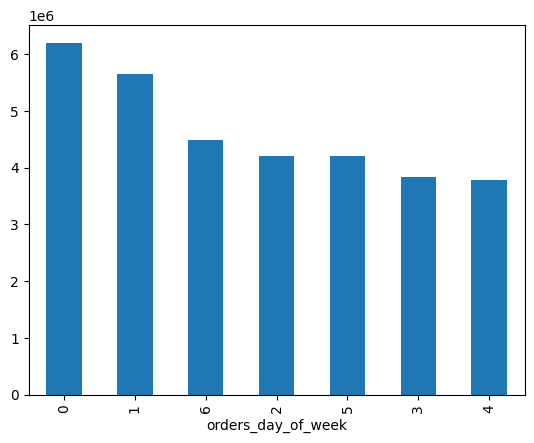

In [4]:
#creating a bar chart from largest to smallest
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

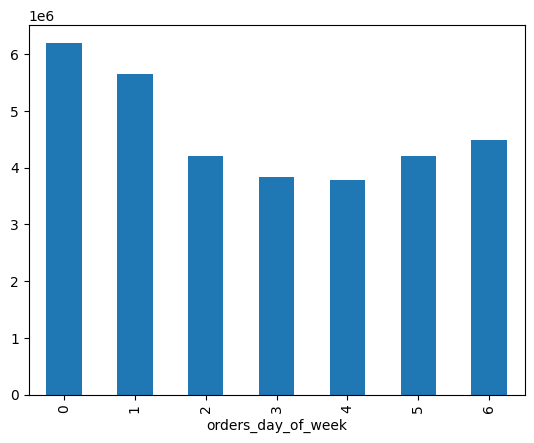

In [5]:
#creating bar chart in order
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
#printed frequencies in order
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

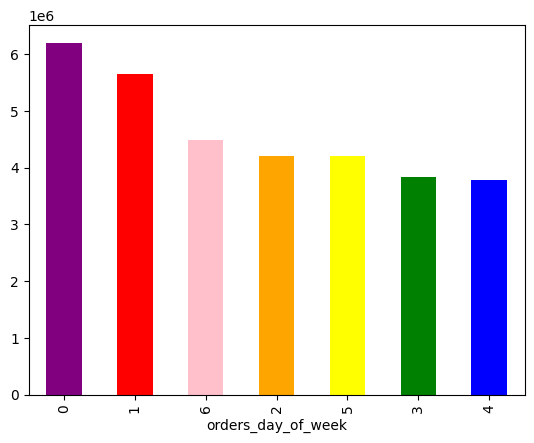

In [7]:
#creating a bar chart with color
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [1]:
#to save bar chart
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

NameError: name 'ords_prods_merge' is not defined

In [9]:
#to save chart as an image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 03. Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

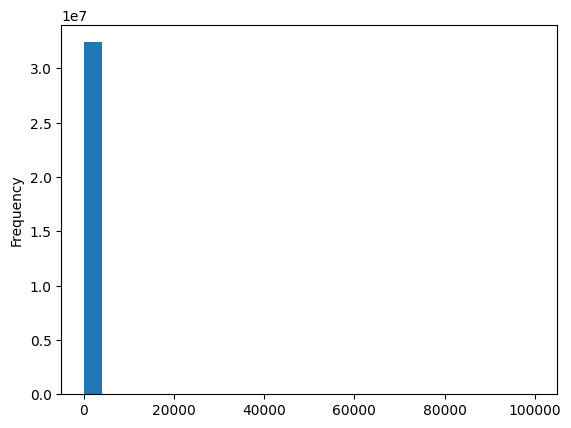

In [10]:
#creating histogram for 'prices'
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

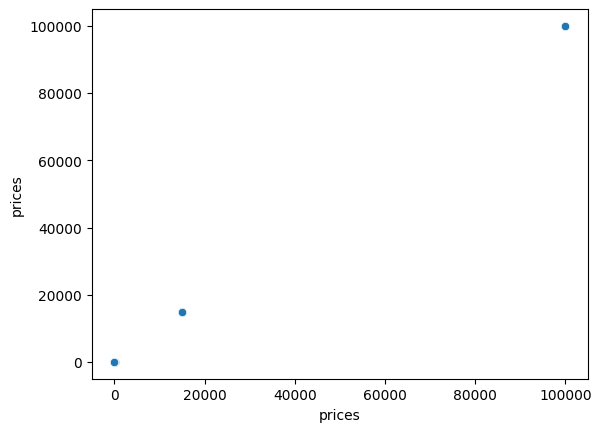

In [11]:
#creating scatterplot for "prices" to find outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [12]:
#to search for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency
10030345,912404,17,12,2,14,5.0,21553,5,0,both,...,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,both,...,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,both,...,High-range product,Regularly busy,Regularly busy days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,both,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,both,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,both,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,both,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,both,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,both,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [13]:
#to turn outliers into NaNs
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [14]:
#check
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

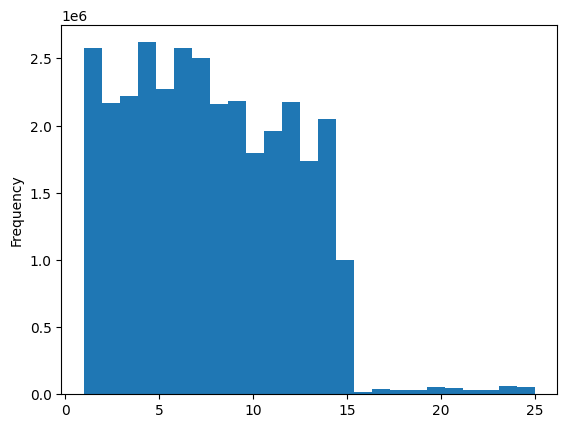

In [15]:
#creating histogram for 'prices'
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

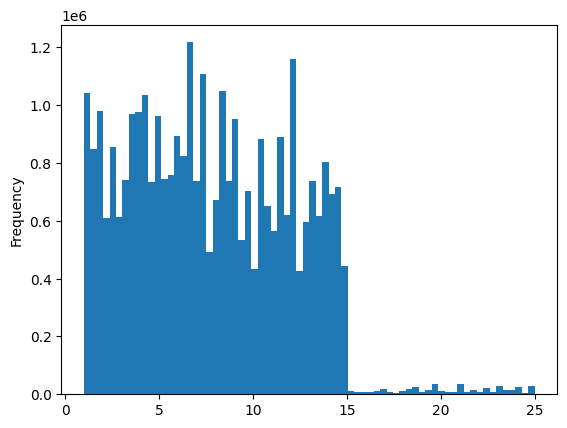

In [16]:
#creating histogram for 'prices'
ords_prods_merge['prices'].plot.hist(bins = 70)

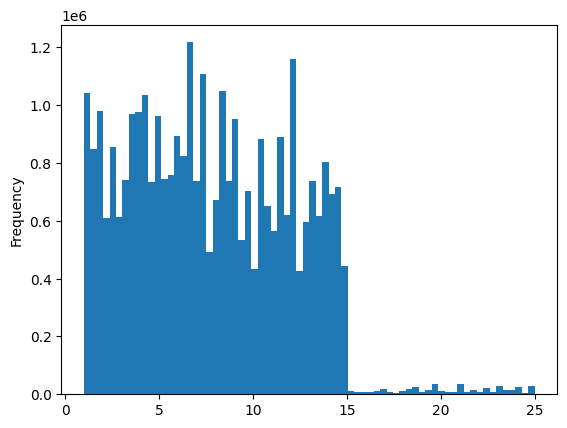

In [17]:
#to save histogram
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [18]:
#to save as an image
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# 04. Creating Line Charts

In [19]:
#sampling data: to create a 70/30 ratio sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [20]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [21]:
#create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [22]:
#store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [23]:
#store 30% of the sample in dataframe small
small = ords_prods_merge[~dev]

In [24]:
#check
len(ords_prods_merge)

32404859

In [25]:
#check
len(big) + len(small)

32404859

In [26]:
#reducing sample to only necessary columns
df_2 = small[['orders_day_of_week','prices']]

In [ ]:
#creating line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')